# Discrete probabilities

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
plt.style.use('dark_background')

## Coin flips (Bernoulli/Binomial Distribution)

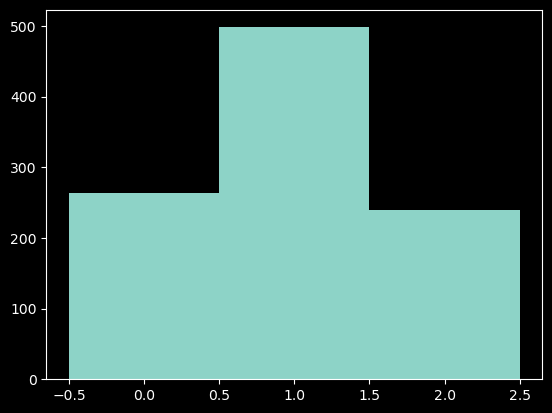

In [2]:
flips1 = np.random.binomial(2, p=0.5, size=1000)
bins = np.arange(min(flips1), max(flips1) + 2) - 0.5
h1=plt.hist(flips1, bins=bins)

## Die roll (Discrete Uniform Distribution)

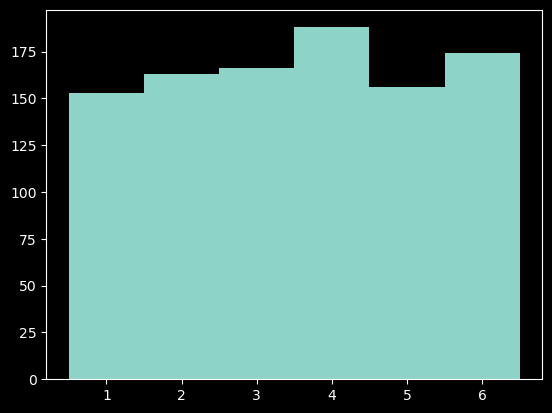

In [3]:
rolls = np.random.randint(1,7, size=1000)
bins = np.arange(1, max(rolls)+2) - 0.5
_ = plt.hist(rolls, bins=bins)

## Bernoulli trials/Binomial Distribuition
Bernoulli trial (or binomial trial) is a random experiment with exactly two possible outcomes, "success" and "failure", in which the probability of success is the same every time the experiment is conducted.

In [4]:
def bernoulli_trials(n, p):
    """Perform n Bernoulli trials with success probability p
    and return number of successes."""
    import numpy as np
    # Initialize number of successes: n_success
    n_success = 0
    # Perform trials
    for i in range(n):
        # Choose random number between zero and one: random_number
        random_number=np.random.random()
        # If less than p, it's a success so add one to n_success
        if random_number < p:
            n_success+=1
    return n_success

Let's say a bank made 100 mortgage loans. It is possible that anywhere between 0 and 100 of the loans will be defaulted upon. You would like to know the probability of getting a given number of defaults, given that the probability of a default is p = 0.05.

Expected defaults 4.964


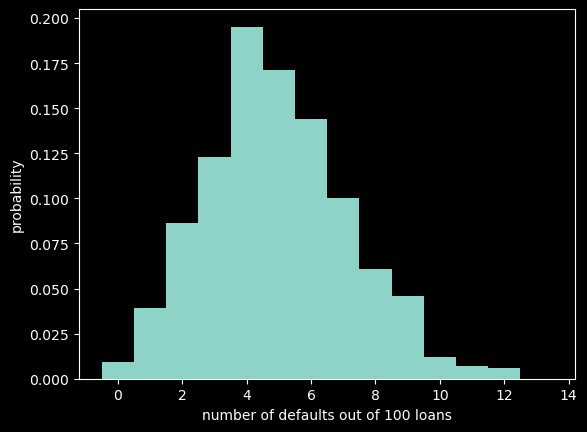

In [5]:
np.random.seed(0)
n_defaults =[bernoulli_trials(100, 0.05) for trial in range(1000)]
print('Expected defaults', np.mean(n_defaults))
bins = np.arange(0, max(n_defaults) + 1) - 0.5
_ = plt.hist(n_defaults, density=True, bins=bins)
_ = plt.xlabel('number of defaults out of 100 loans')
_ = plt.ylabel('probability')

Expected defaults  4.984


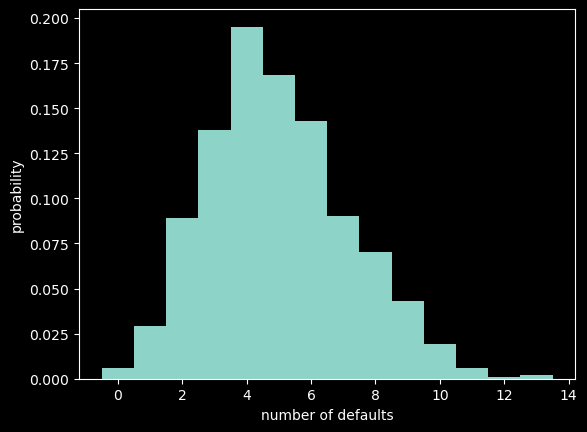

In [6]:
np.random.seed(0)
n_defaults = np.random.binomial(100, 0.05, size=1000)
print('Expected defaults ', np.mean(n_defaults))
bins = np.arange(0, max(n_defaults) + 1) - 0.5
_ = plt.hist(n_defaults, density=True, bins=bins)
_ = plt.xlabel('number of defaults')
_ = plt.ylabel('probability')

If interest rates are such that the bank will lose money if 10 or more of its loans are defaulted upon, what is the probability that the bank will lose money?

In [7]:
# Divide the number of simulations resuting >=10 by the total number of simulations
sum(np.array(n_defaults) >= 10) / len(n_defaults)

0.029

In [8]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)
    # x-data for the ECDF: x
    x = np.sort(data)
    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n
    return x, y

Expected defaults 4.984


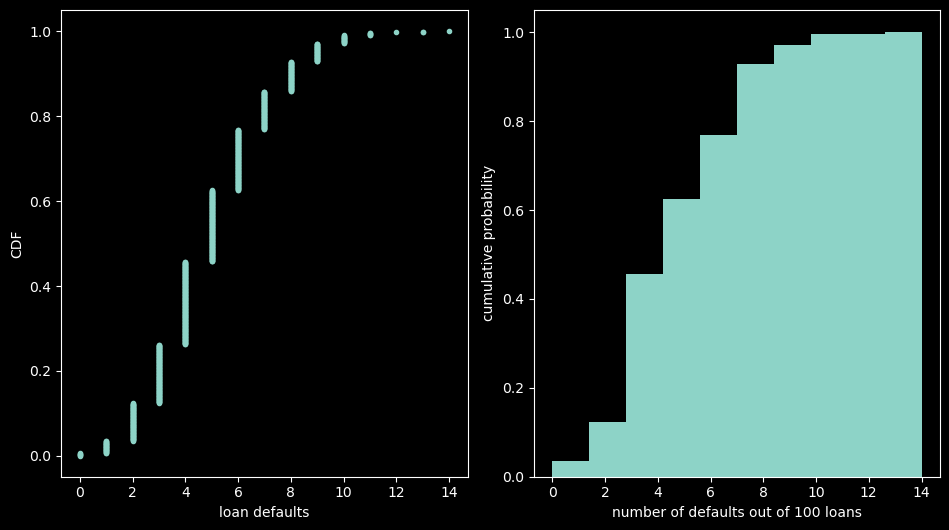

In [9]:
x, y = ecdf(n_defaults)
plt.figure(figsize=(19.2/2, 10.8/2))
plt.subplot(1,2,1)
_ = plt.plot(x, y, marker='.', linestyle='none')
_ = plt.xlabel('loan defaults')
_ = plt.ylabel('CDF')
plt.subplot(1,2,2)
print('Expected defaults', np.mean(n_defaults))
_ = plt.hist(n_defaults, density=True, cumulative=True)
_ = plt.xlabel('number of defaults out of 100 loans')
_ = plt.ylabel('cumulative probability')
plt.tight_layout()

## Poisson Distribution
is a discrete probability distribution that expresses the probability of a given number of events occurring in a fixed interval of time or space if these events occur with a known constant rate and independently of the time since the last event.

The Poisson distribution can also be used for the number of events in other specified intervals such as distance, area or volume.

Poisson Distribution models counts.

The timing of an event is completely independent of when the previous event happened:
* Natural births in a given hospital
* Hit on a website during a given hour
* Meteor strikes
* Molecular colisions in a gas
* Aviation incidents

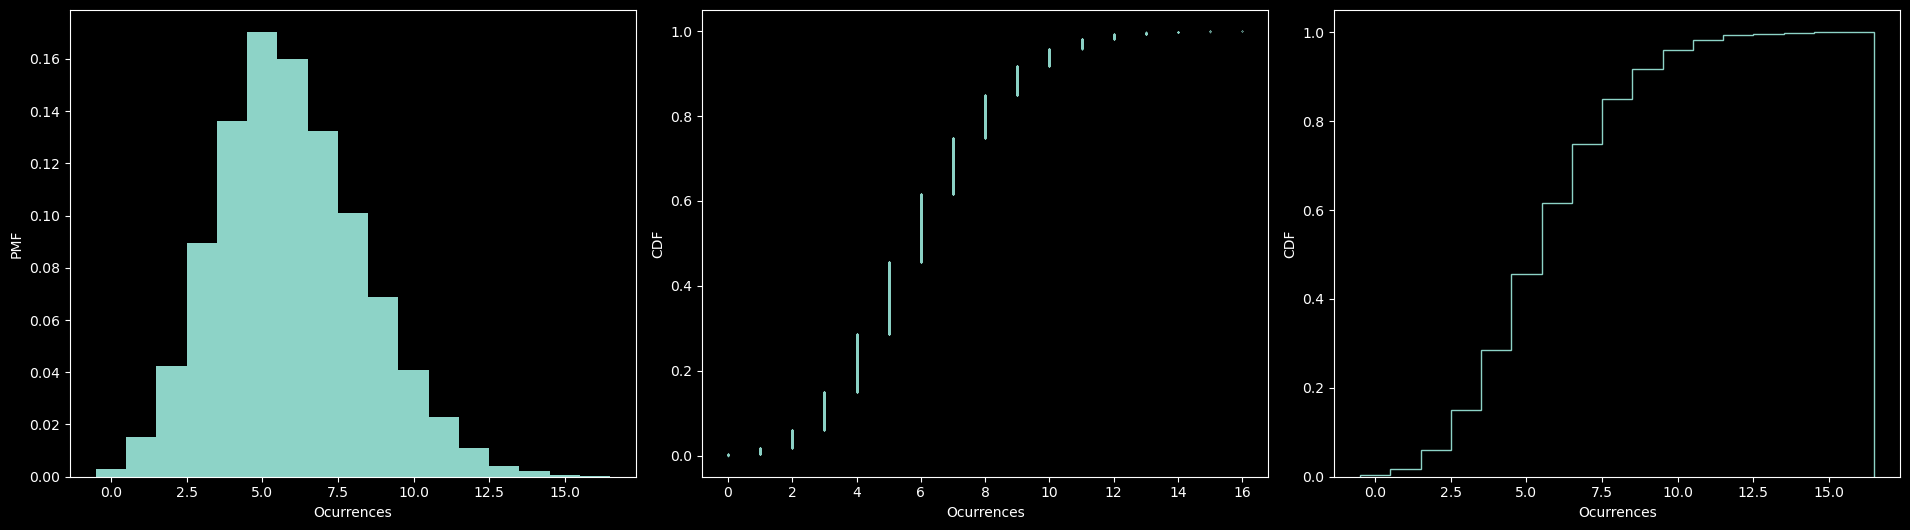

In [10]:
samples = np.random.poisson(lam=6, size=10000)
bins = np.arange(0, max(samples) + 2) - 0.5
plt.figure(figsize=(19.2, 10.8/2))
plt.subplot(1,3,1)
_ = plt.hist(samples, bins=bins, density=True)
_ = plt.xlabel('Ocurrences')
_ = plt.ylabel('PMF')
x, y = ecdf(samples)
plt.subplot(1,3,2)
_ = plt.plot(x, y, marker='.', linestyle='none', markersize=.4)
_ = plt.xlabel('Ocurrences')
_ = plt.ylabel('CDF')
plt.subplot(1,3,3)
_ = plt.hist(samples, bins=bins, density=True, cumulative=True, histtype='step')
_ = plt.xlabel('Ocurrences')
_ = plt.ylabel('CDF')
plt.tight_layout()

## Relationship between Binomial and Poisson distributions

In [11]:
np.random.seed(0)
samples_poisson = np.random.poisson(lam=10, size=10000)
# Print the mean and standard deviation
print('Poisson:     ', np.mean(samples_poisson),
                       np.std(samples_poisson))

# Specify values of n and p to consider for Binomial: n *  p = lambda = 10
n = [20, 100, 1000, 10000]
p = [0.5, 0.1, 0.01, 0.001]

# Draw 10,000 samples for each n,p pair: samples_binomial
for i in range(len(n)):
    np.random.seed(0)
    samples_binomial = np.random.binomial(n=n[i], p=p[i],size=10000)
    # Print results
    print('n =', n[i], 'Binom:', np.mean(samples_binomial), np.std(samples_binomial))


Poisson:      9.9973 3.189528603101092
n = 20 Binom: 9.9682 2.249486332476817
n = 100 Binom: 9.9582 3.0146397396703972
n = 1000 Binom: 9.9569 3.1632961274594575
n = 10000 Binom: 9.9559 3.1778538654255324


> When we have rare events (low p, high n), the Binomial distribution is Poisson. 

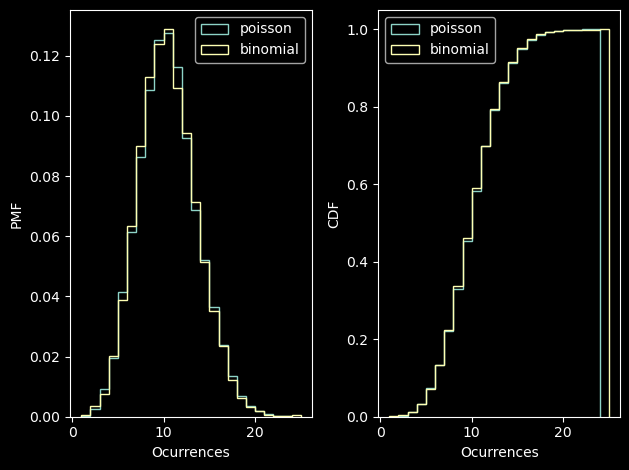

In [12]:
plt.subplot(1,2,1)
_=plt.hist(samples_poisson, density=True, bins=np.unique(samples_poisson), histtype='step', label='poisson')
_=plt.hist(samples_binomial, density=True, bins=np.unique(samples_binomial), histtype='step', label='binomial')
plt.legend()
_ = plt.xlabel('Ocurrences')
_ = plt.ylabel('PMF')
plt.subplot(1,2,2)
_=plt.hist(samples_poisson, density=True, cumulative=True, bins=np.unique(samples_poisson), histtype='step', label='poisson')
_=plt.hist(samples_binomial, density=True, cumulative=True, bins=np.unique(samples_binomial), histtype='step', label='binomial')
plt.legend()
_ = plt.xlabel('Ocurrences')
_ = plt.ylabel('CDF')
plt.tight_layout()

## How many no-hitters in a season?
In baseball, a no-hitter is a game in which a pitcher does not allow the other team to get a hit.

In [13]:
nohitter = pd.read_csv('mlb_nohitters.zip', parse_dates=['date'], index_col=['date'])
nohitter.info()
nohitter

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 294 entries, 1876-07-15 to 2015-10-03
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   game_number      294 non-null    int64 
 1   winning_team     228 non-null    object
 2   losing_team      228 non-null    object
 3   winning_pitcher  228 non-null    object
dtypes: int64(1), object(3)
memory usage: 11.5+ KB


,game_number,winning_team,losing_team,winning_pitcher
date,,,,
1876-07-15,140,NaN,NaN,NaN
1880-06-12,1035,NaN,NaN,NaN
1880-06-17,1046,NaN,NaN,NaN
1880-08-19,1177,NaN,NaN,NaN
1880-08-20,1179,NaN,NaN,NaN
...,...,...,...,...
2015-07-25,210250,PHI,CHN,Cole Hamels
2015-08-12,210490,SEA,BAL,Hisashi Iwakuma
2015-08-21,210610,HOU,LAN,Michael Fiers


This is a rare event, and since the beginning of the so-called modern era of baseball (starting in 1901), there have only been 251 of them through the 2015 season in over 200,000 games.

In [14]:
nohitter = nohitter.loc['1901':'2015',:]
nohitter.shape[0]

251

In [15]:
nohitter_times = nohitter.groupby(nohitter.index.year).game_number.count()
nohitter_times

date
1901    1
1902    1
1903    1
1904    2
1905    4
       ..
2011    3
2012    7
2013    3
2014    5
2015    7
Name: game_number, Length: 96, dtype: int64

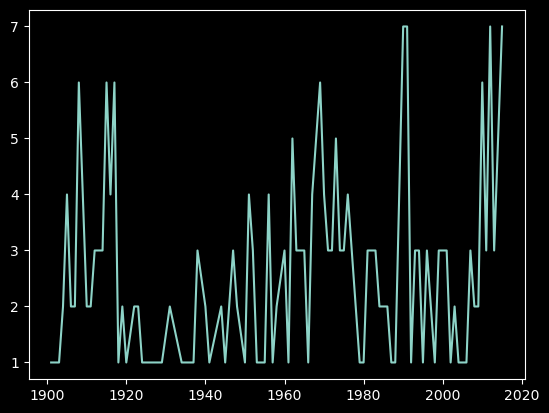

In [16]:
plt.plot(nohitter_times);plt.show()

 The ECDF of the number of no-hitters in a season is shown to the right

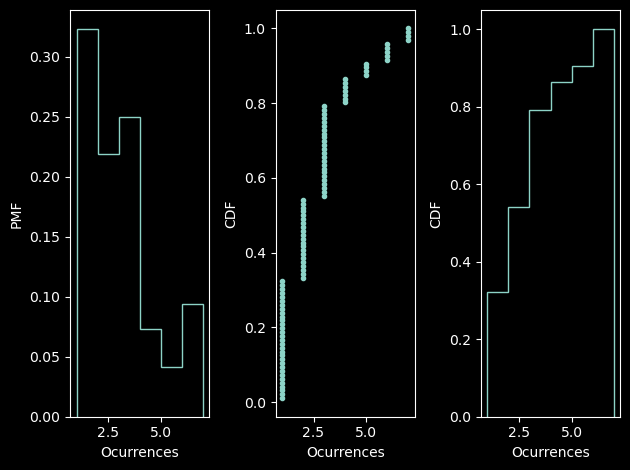

In [17]:
plt.subplot(1,3,1)
_=plt.hist(nohitter_times, density=True, bins=np.unique(nohitter_times), histtype='step')
_ = plt.xlabel('Ocurrences')
_ = plt.ylabel('PMF')
plt.subplot(1,3,2)
x,y=ecdf(nohitter_times)
plt.plot(x,y, marker='.', linestyle='none')
_ = plt.xlabel('Ocurrences')
_ = plt.ylabel('CDF')
plt.subplot(1,3,3)
plt.hist(nohitter_times, cumulative=True, density=True, bins=np.unique(nohitter_times), histtype='step')
_ = plt.xlabel('Ocurrences')
_ = plt.ylabel('CDF')
plt.tight_layout()

1990, 1991, 2012 and 2015 featured the most no-hitters of any season of baseball (there were seven).

In [18]:
nohitter_times.iloc[np.lexsort((-nohitter_times.index.values, -nohitter_times.values))].head()

date
2015    7
2012    7
1991    7
1990    7
2010    6
Name: game_number, dtype: int64

In [19]:
nohitter_times.loc[nohitter_times==nohitter_times.max()]

date
1990    7
1991    7
2012    7
2015    7
Name: game_number, dtype: int64

Total of no-hitters, total of seasons and average:

In [20]:
nohitter_times.sum(), nohitter_times.count(), nohitter_times.mean()

(251, 96, 2.6145833333333335)

Given that there are on average 251/96 (2.6145833333333335) no-hitters per season, what is the probability of having seven or more in a season?

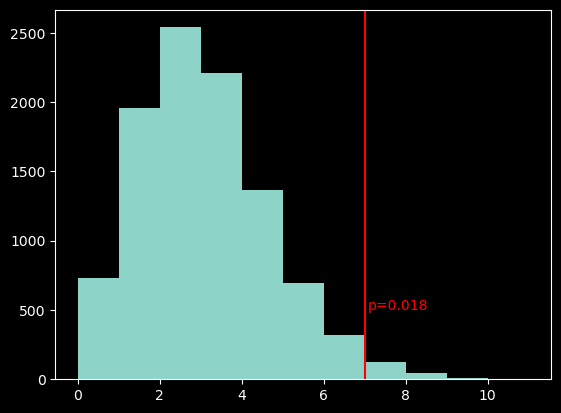

In [21]:
n_nohitters = np.random.poisson(lam=251/96, size=10000)
p = np.sum(n_nohitters >= 7) / len(n_nohitters)
_ = plt.hist(n_nohitters, bins=np.unique(n_nohitters))
_ = plt.axvline(7, color='red')
_ = plt.annotate('p={:.3f}'.format(p), xy=(7*1.01, 500), color='red')

To get approximate probabiliy via a binomial distribution specify high values of n and small values of p such that n * p = 251/96

large_n=10000 small_p=0.0002614583333333333


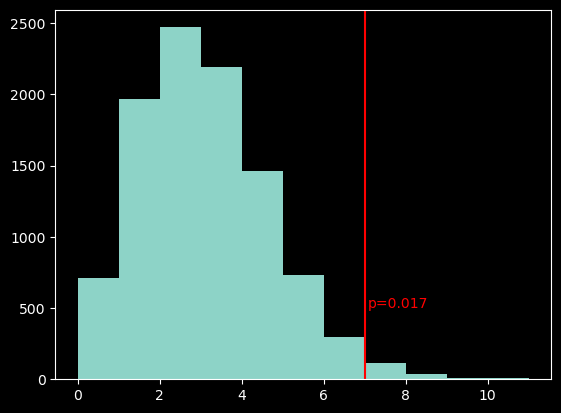

In [22]:
large_n = 10000
small_p = nohitter_times.mean() / large_n # i.e. (251/96)/10000 = 0.0002614583333333333
print(f'{large_n=} {small_p=}')
n_nohitters_binomial = np.random.binomial(n=large_n, p=small_p, size=10000)
p=np.sum(n_nohitters_binomial >= 7) / len(n_nohitters_binomial)
_ = plt.hist(n_nohitters_binomial, bins=np.unique(n_nohitters_binomial))#, histtype='step')
_ = plt.axvline(7, color='red')
_ = plt.annotate('p={:.3f}'.format(p), xy=(7*1.01, 500), color='red')